In [1]:
import os
import pickle
import sys
import warnings
from glob import glob
import re
from google_trans_new import google_translator  
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import lightgbm

In [2]:
dataset_dir="../data_dir/"

In [3]:
# 読み込むファイルを定義します。
inputs = {
    "stock_list": f"{dataset_dir}/stock_list.csv",
    "stock_price": f"{dataset_dir}/stock_price.csv",
    "stock_fin": f"{dataset_dir}/stock_fin.csv",
    # 本チュートリアルでは使用しないため、コメントアウトしています。
    # "stock_fin_price": f"{dataset_dir}/stock_fin_price.csv.gz",
    "stock_labels": f"{dataset_dir}/stock_labels.csv",
}

# ファイルを読み込みます
dfs = {}
for k, v in inputs.items():
    print(k)
    dfs[k] = pd.read_csv(v)

stock_list
stock_price
stock_fin
stock_labels


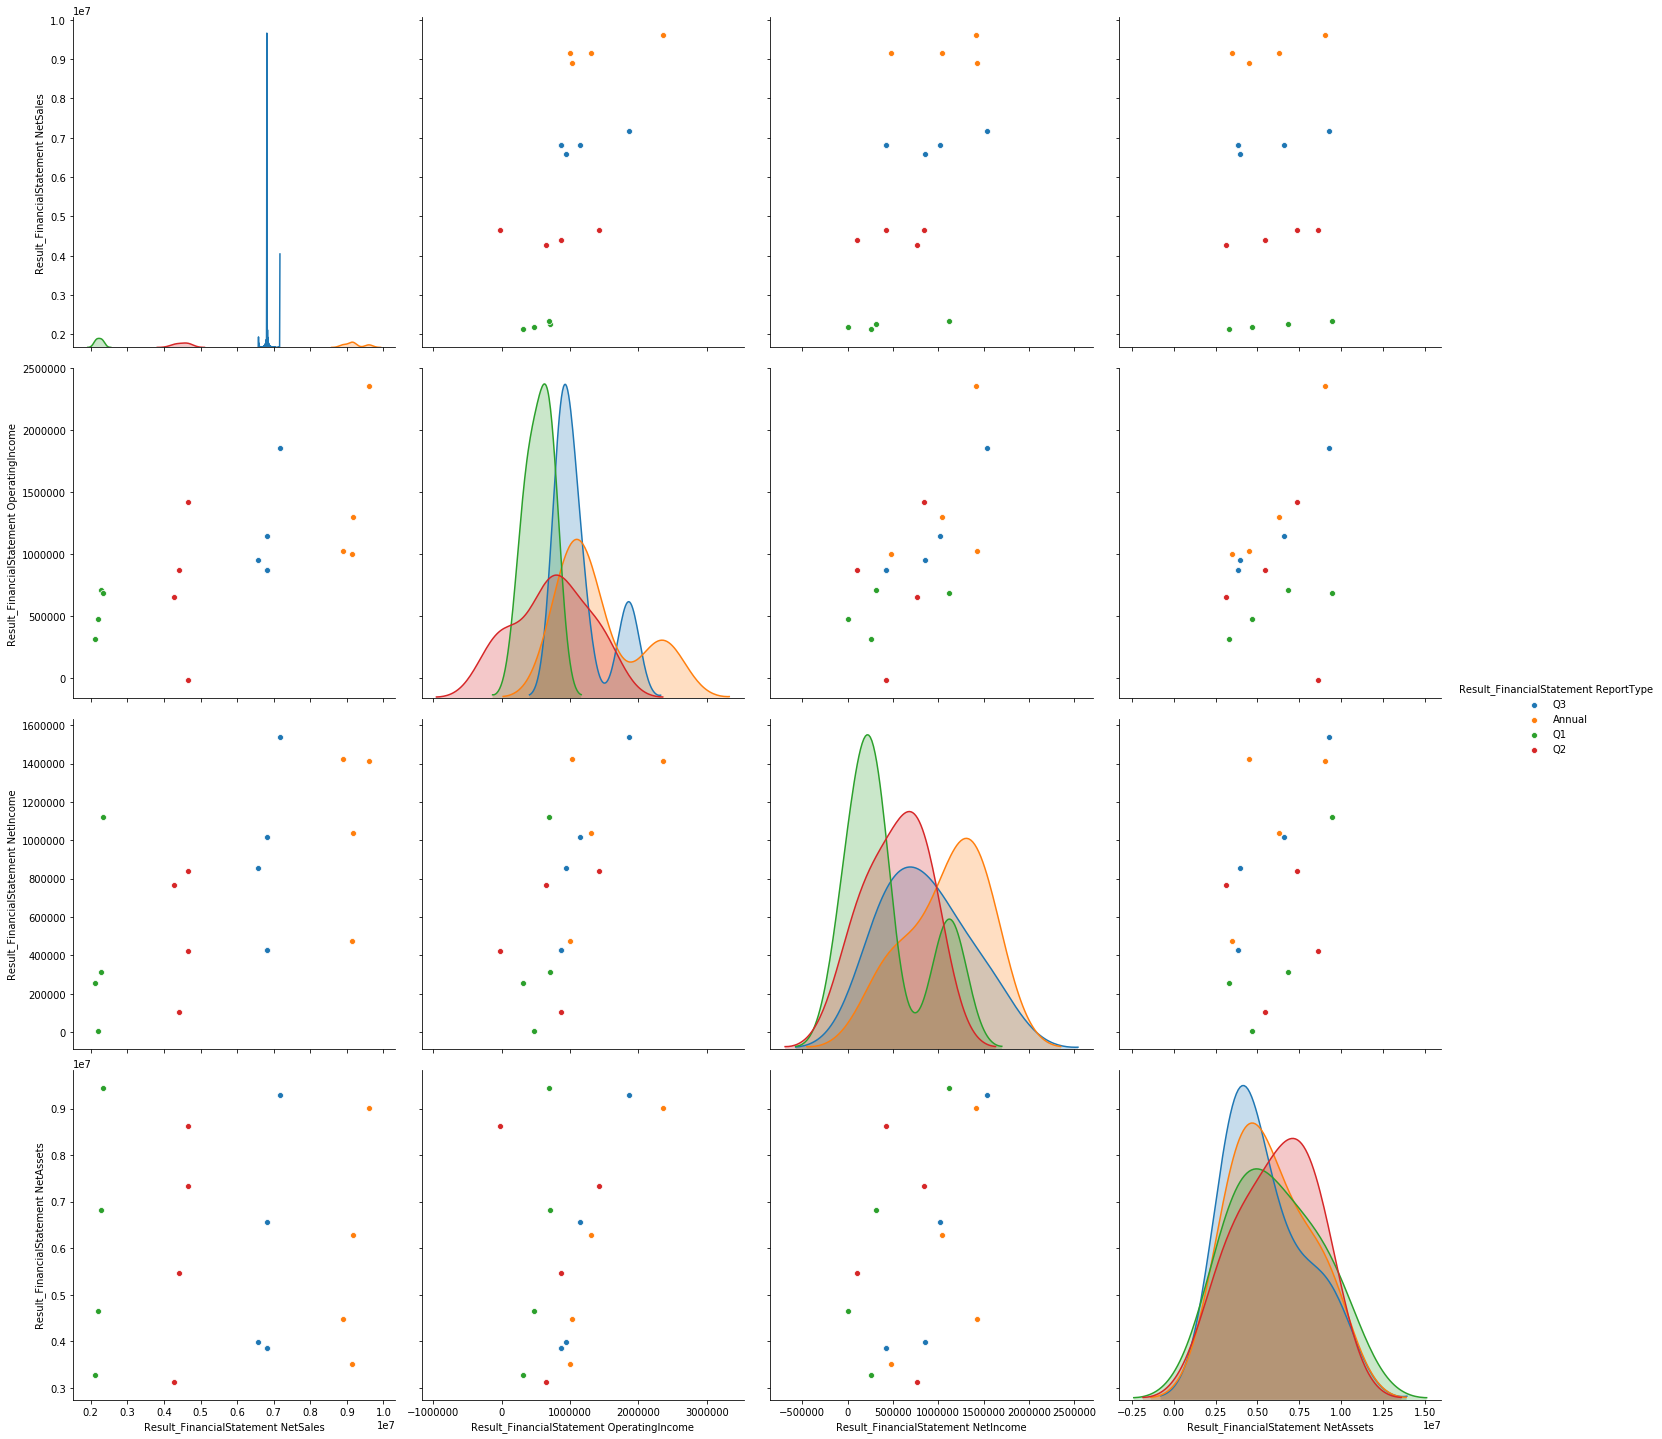

In [4]:
# stock_finの読み込み
fin = dfs["stock_fin"].copy()

# 銘柄コード9984にデータを絞る
code = 9984
fin_data = fin[fin["Local Code"] == code].copy()

# 日付列をpd.Timestamp型に変換してindexに設定
fin_data["datetime"] = pd.to_datetime(fin_data["base_date"])
fin_data.set_index("datetime", inplace=True)
# 2019年までの値を表示
fin_data = fin_data[:"2019"]

# プロット対象を定義
columns = [
    "Result_FinancialStatement NetSales",  # 売上高
    "Result_FinancialStatement OperatingIncome",  # 営業利益
    "Result_FinancialStatement NetIncome",  # 純利益
    "Result_FinancialStatement NetAssets",  # 純資産
    "Result_FinancialStatement ReportType"  # 決算期
]

# プロット
sns.pairplot(fin_data[columns], hue="Result_FinancialStatement ReportType", height=5)

In [5]:
translator = google_translator()
translator.translate('base date',lang_src='en',lang_tgt='ja')  
#translator.translate(fin.columns[0], lang_src='en', lang_tgt='ja')

'基準日 '

In [6]:
for key in dfs:
    print(key)
    if key =="stock_fin":
        print(type(key))
        a =[]
        #key = "stock_fin"
        for column in dfs[key].columns:
            m=re.sub( r"([A-Z])", r" \1", column)
            m=re.split('[_]', m)
            m1=["" if s == " Result" else "来年の" if s==" Forecast" else s for s in m]
            #print(m1)
            m1=" ".join(m1)
            m1=m1.lower()
            #print(m1)
            #'negative' if a < 0 else 'positive' if a > 0 else 'zero'
            new_column=translator.translate(m1, lang_src='en', lang_tgt='ja')
            dfs[key].rename(columns={column:new_column},inplace=True)
            a.append(new_column)
            #df.rename(columns={'A': 'a'}, index={'ONE': 'one'})
        print(a)

stock_list
stock_price
stock_fin
<class 'str'>
['基準日 ', 'ローカルコード ', '財務諸表会計基準 ', '財務諸表会計期末 ', '財務諸表レポートタイプ ', '財務諸表会計年度 ', '財務諸表の変更日 ', '財務諸表会社タイプ ', '年度末の財務諸表変更 ', '財務諸表売上高 ', '財務諸表の営業利益 ', '財務諸表経常利益 ', '財務諸表の純利益 ', '財務諸表の総資産 ', '財務諸表純資産 ', '営業活動による財務諸表のキャッシュフロー ', '財務活動による財務諸表のキャッシュフロー ', '投資活動による財務諸表のキャッシュフロー ', '来年の財務諸表会計基準 ', '来年の財務諸表会計期末 ', '来年の財務諸表レポートタイプ ', '来年の財務諸表会計年度 ', '来年の財務諸表修正日 ', '来年の財務諸表会社タイプ ', '来年の決算期の財務諸表変更 ', '来年の財務諸表売上高 ', '来年の財務諸表営業利益 ', '来年の財務諸表経常利益 ', '来年の財務諸表純利益 ', '配当期終了 ', '配当レポートタイプ ', '配当年度 ', '配当変更日 ', '配当基準日 ', '配当配当支払日 ', '配当四半期配当1株当たり ', '配当1株当たり年間配当 ', '来年の配当決算 ', '来年の配当レポートタイプ ', '来年の配当年度 ', '来年の配当変更日 ', '来年の配当基準日 ', '来年配当1株当たり四半期配当 ', '来年配当1株当たり年間配当 ']
stock_labels
